# Activation in Custom Layers

In this lab, we extend our knowledge of building custom layers by adding an activation parameter. The implementation is pretty straightforward as you'll see below.

In [2]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np

## Adding an activation layer

To use the built-in activations in Keras, we can specify an `activation` parameter in the `__init__()` method of our custom layer class. From there, we can initialize it by using the `tf.keras.activations.get()` method. This takes in a string identifier that corresponds to one of the [available activations](https://keras.io/api/layers/activations/#available-activations) in Keras. Next, you can now pass in the forward computation to this activation in the `call()` method.

In [3]:
# In this class, we build a custom dense layer with activation
class SimpleDense(Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    # A method to initialize the state of the layer
    def build(self, input_shape):
        # Weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
                            initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                            trainable=True)
        # Biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
                            initial_value=b_init(shape=(self.units,), dtype='float32'),
                            trainable=True)

    # A method to compute output of the layer from a given inputs
    def call(self, inputs):
        output = tf.matmul(inputs, self.w) + self.b
        return self.activation(output)

We can now pass in an activation parameter to our custom layer. The string identifier is mostly the same as the function name so 'relu' below will get `tf.keras.activations.relu`.

In [4]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255., X_test / 255.

# Creating a simple sequential model using our custom layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    SimpleDense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=10,
                   batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4077 - accuracy: 0.8828 - val_loss: 0.1934 - val_accuracy: 0.9439
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1917 - accuracy: 0.9447 - val_loss: 0.1395 - val_accuracy: 0.9588
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1440 - accuracy: 0.9584 - val_loss: 0.1126 - val_accuracy: 0.9657
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1163 - accuracy: 0.9658 - val_loss: 0.1029 - val_accuracy: 0.9699
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1001 - accuracy: 0.9702 - val_loss: 0.0882 - val_accuracy: 0.9736
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0874 - accuracy: 0.9741 - val_loss: 0.0799 - val_accuracy: 0.9744
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0762 - accuracy: 0.9772 - val_loss: 0.0767 - val_accuracy: 0.9775
Epoch 

In [7]:
import pandas as pd

history_df = pd.DataFrame(history.history, columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.407657,0.882850,0.193447,0.9439
1,0.191709,0.944717,0.139490,0.9588
2,0.144043,0.958400,0.112574,0.9657
3,0.116287,0.965833,0.102948,0.9699
4,0.100128,0.970233,0.088166,0.9736
5,0.087398,0.974083,0.079895,0.9744
6,0.076220,0.977200,0.076651,0.9775
7,0.068841,0.979567,0.069483,0.9791
8,0.062972,0.980533,0.069768,0.9783
9,0.056418,0.982000,0.071569,0.9780


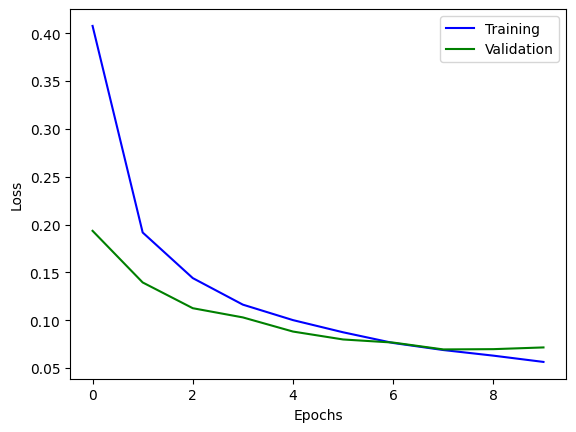

In [10]:
import matplotlib.pyplot as plt

history_df['loss'].plot(c='blue', label='Training')
history_df['val_loss'].plot(c='green', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()